# iris 鸢尾花数据集 多分类

## 加载iris数据集，向量化数据集

In [84]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
datas = iris.data
labels = iris.target

print('datas> ', datas)
print('labels> ', labels)

# 向量化 labels
y = np.zeros((labels.shape[0], len(iris.target_names)))
for i, label in enumerate(labels):
    y[i, label] = 1

labels = y

print('vertorization labels> ', labels)

datas>  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

## 分隔训练集60％　验证集20％　测试集20％

In [85]:
X_train, X_test, y_train, y_test = train_test_split(datas, labels, test_size=0.2, random_state=1)
num_validation_set = 30
X_val = X_train[:num_validation_set]
y_val = y_train[:num_validation_set]
X_train = X_train[num_validation_set:]
y_train = y_train[num_validation_set:]

print('train set X({}) = {}\ty({}) = {}'.format(len(X_train), X_train[0], len(y_train), y_train[0]))
print('validation set X({}) = {}\ty({}) = {}'.format(len(X_val), X_val[0], len(y_val), y_val[0]))
print('test set X({}) = {}\ty({}) = {}'.format(len(X_test), X_test[0], len(y_test), y_test[0]))

train set X(90) = [4.8 3.4 1.6 0.2]	y(90) = [1. 0. 0.]
validation set X(30) = [6.1 3.  4.6 1.4]	y(30) = [0. 1. 0.]
test set X(30) = [5.8 4.  1.2 0.2]	y(30) = [1. 0. 0.]


## 定义神经网络模型

In [127]:
from keras import models
from keras import layers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), verbose=0)
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 28us/step


[0.1509227603673935, 1.0]

## 评估结果是否正确

In [128]:
y_preds = model.predict(X_test)
for y_pred, y in zip(y_preds, y_test):
    y_pred_max = max(y_pred)
    y_pred_max_index = y_pred.tolist().index(y_pred_max)
    y_max_index = y.tolist().index(max(y))
    print("{}\t{}\t{}\t{}".format(y_pred_max, y_pred_max_index, 
                                  y_max_index, y_pred_max_index == y_max_index))

0.9989328980445862	0	0	True
0.9124910831451416	1	1	True
0.9542614221572876	1	1	True
0.9985241293907166	0	0	True
0.5765035152435303	2	2	True
0.8190560936927795	1	1	True
0.7806730270385742	2	2	True
0.9965046644210815	0	0	True
0.9948394894599915	0	0	True
0.9302446842193604	2	2	True
0.8231262564659119	1	1	True
0.9980759620666504	0	0	True
0.9079173803329468	2	2	True
0.9160961508750916	1	1	True
0.7589894533157349	1	1	True
0.9955571293830872	0	0	True
0.9299983978271484	1	1	True
0.6339312195777893	1	1	True
0.996461808681488	0	0	True
0.9960863590240479	0	0	True
0.7433353662490845	1	1	True
0.5418271422386169	1	1	True
0.6607027053833008	1	1	True
0.9972683191299438	0	0	True
0.7105347514152527	2	2	True
0.8933607339859009	1	1	True
0.9990814924240112	0	0	True
0.9980416297912598	0	0	True
0.8574339151382446	1	1	True
0.8410456776618958	2	2	True


## 绘制训练和验证的损失率、准确率曲线

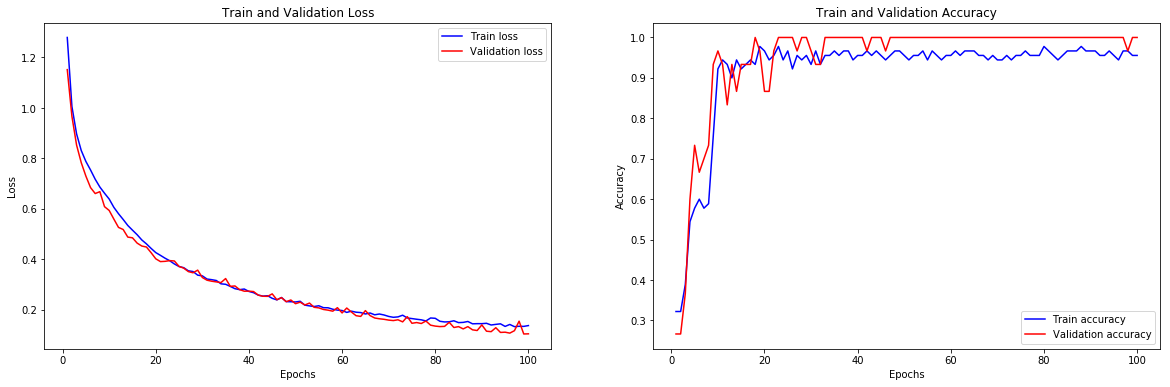

In [130]:
import matplotlib.pyplot as plt


def draw(history):
    hist = history.history
    val_loss = hist['val_loss']
    val_acc = hist['val_acc']
    loss = hist['loss']
    acc = hist['acc']

    epochs = range(1, len(loss)+1)

    plt.figure(figsize=(20, 6))

    plt.subplot(121)
    plt.plot(epochs, loss, 'b', label='Train loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Train and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(epochs, acc, 'b', label='Train accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Train and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()
    
draw(history)

# 优化
* 数据标准化
* 权重正则化
* dropout正则化

## 数据标准化

In [133]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train_std = X_train - mean
X_train_std /= std

X_val_std = X_val - mean
X_val_std /= std

X_test_std = X_test - mean
X_test_std /= std

30/30 [==============================] - 0s 27us/step
model evaluate:  [0.12958694994449615, 0.9666666388511658]


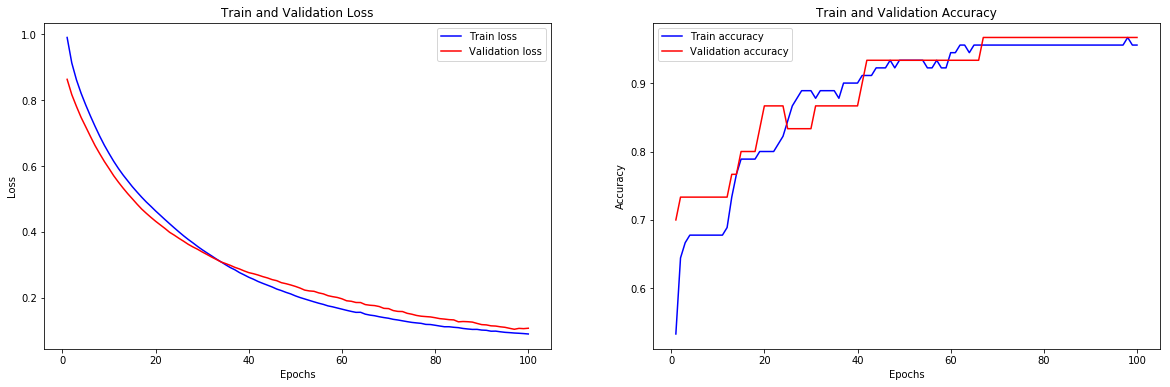

In [136]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_val_std, y_val), verbose=0)
print('model evaluate: ', model.evaluate(X_test_std, y_test))
draw(history)

## 权重正则化

30/30 [==============================] - 0s 31us/step
model evaluate:  [0.19939707219600677, 0.8666666746139526]


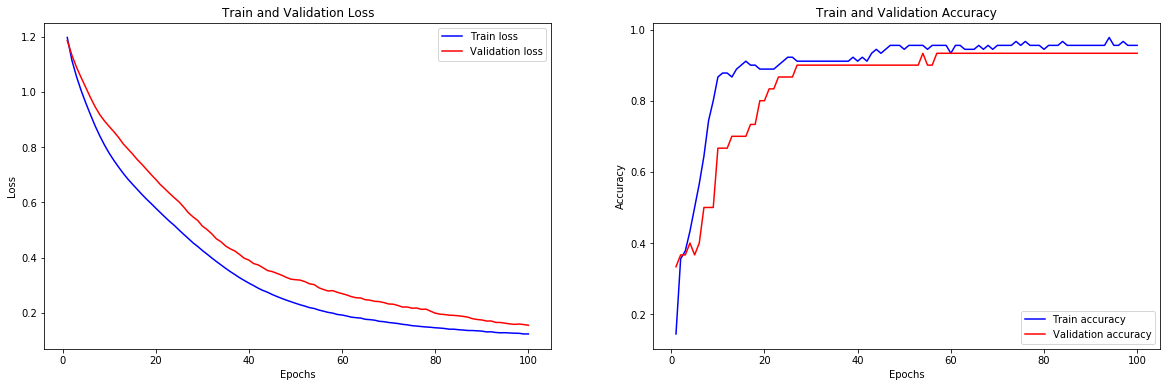

In [140]:
# L2正则化
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_val_std, y_val), verbose=0)
print('model evaluate: ', model.evaluate(X_test_std, y_test))
draw(history)

30/30 [==============================] - 0s 28us/step
model evaluate:  [0.2239275723695755, 0.8999999761581421]


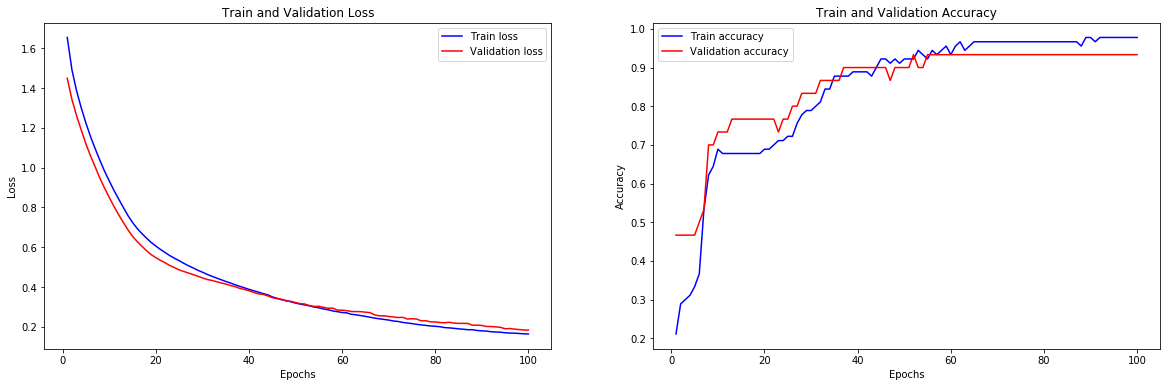

In [141]:
# L1正则化
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                       activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),
                       activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_val_std, y_val), verbose=0)
print('model evaluate: ', model.evaluate(X_test_std, y_test))
draw(history)

30/30 [==============================] - 0s 32us/step
model evaluate:  [0.27342283725738525, 0.8666666746139526]


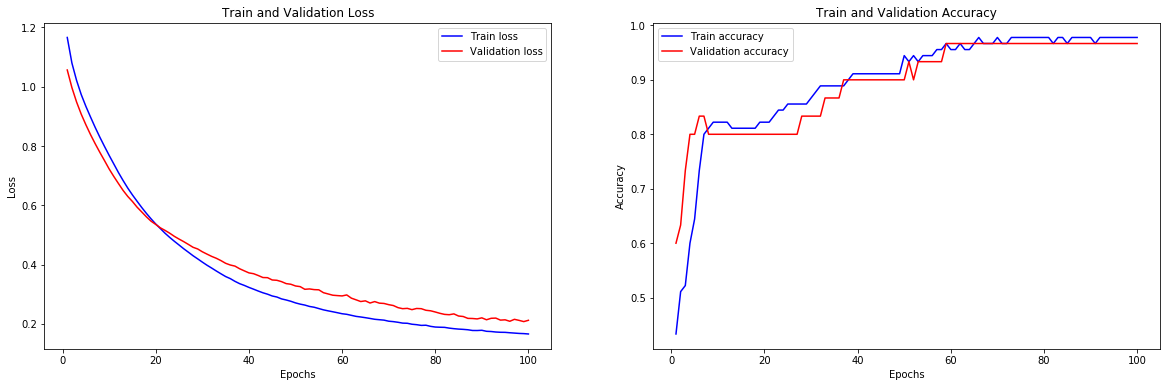

In [142]:
# L1和L2正则化
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.001, 0.001),
                       activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(0.001, 0.001),
                       activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_val_std, y_val), verbose=0)
print('model evaluate: ', model.evaluate(X_test_std, y_test))
draw(history)

## dropout正则化
> 在这里的效果不好

30/30 [==============================] - 0s 35us/step
model evaluate:  [0.373921662569046, 0.800000011920929]


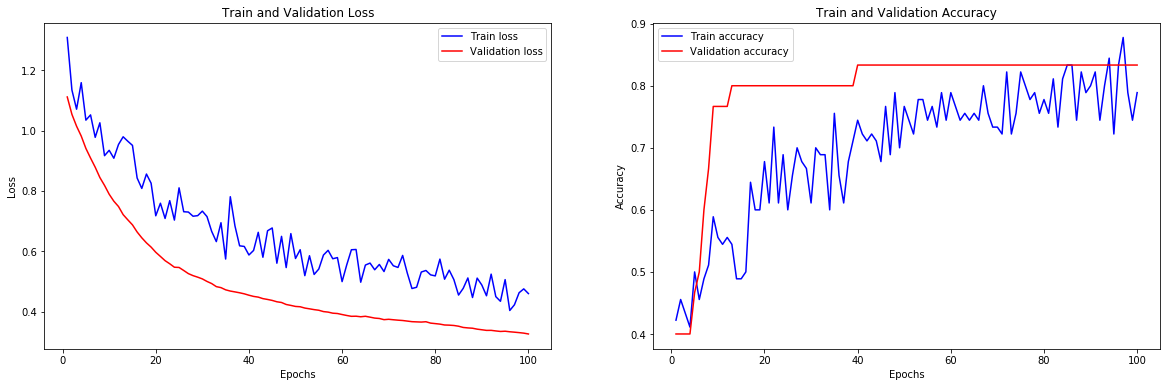

In [152]:
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu', input_shape=(4,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_val_std, y_val), verbose=0)
print('model evaluate: ', model.evaluate(X_test_std, y_test))
draw(history)

## 参考资料
* [使用Keras实现多层前馈神经网络对Iris（鸢尾花卉）数据集进行多分类](https://blog.csdn.net/Dr_Guo/article/details/79966105)
* [sklearn之train_test_split()解析](https://blog.csdn.net/kyriehe/article/details/77507473)
* [How to make Keras Neural Net outperforming Logistic Regression on Iris data](https://stackoverflow.com/questions/36936209/how-to-make-keras-neural-net-outperforming-logistic-regression-on-iris-data)
* [Multi-Class Classification Tutorial with the Keras Deep Learning Library](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/)